# Exercício da Aula 3

O objetivo deste exercício é aplicar técnicas de Feature Engineering para transformar e melhorar a qualidade dos dados em um cenário de análise de crédito, com foco em variáveis categóricas e numéricas. Os alunos trabalharão com um dataset fictício de Análise de Crédito e serão desafiados a realizar as seguintes atividades:

- Análise Exploratória de Dados:
  - Distribuição das Variáveis Categóricas: Visualização da distribuição das variáveis categóricas usando gráficos de contagem.
  - Distribuição das Variáveis Numéricas: Análise das variáveis numéricas com histogramas e gráficos de densidade.
  - Boxplots: Criação de boxplots para variáveis numéricas para identificar outliers e entender a distribuição dos dados.
  - Matriz de Correlação: Visualização da correlação entre variáveis numéricas.
  - Análise da Variável de Destino: Análise da distribuição da variável de destino, que indica a qualidade do crédito.

- Redução de Dimensionalidade:
  - Encoding das Variáveis Categóricas: Aplicação de one-hot encoding para variáveis categóricas e concatenação com variáveis numéricas.
  - Normalização: Aplicação de normalização nos dados codificados.
  - PCA (Principal Component Analysis): Redução da dimensionalidade para 2 componentes principais e visualização dos dados.
  - t-SNE (t-Distributed Stochastic Neighbor Embedding): Redução da dimensionalidade para visualização em 2D.
  - LDA (Linear Discriminant Analysis): Redução da dimensionalidade maximizando a separação entre classes.

- Balanceamento de Classes:
  - SMOTE (Synthetic Minority Over-sampling Technique): Aplicação de SMOTE para balancear as classes no dataset.

- Documentação e Relatório:
    - Relatório: Documente todos os passos seguidos, as decisões tomadas, e as descobertas realizadas. Inclua gráficos e tabelas relevantes para suportar suas conclusões. Discuta as implicações das transformações de features na análise final.

# Dataset "Clientes de Banco"

Este dataset contém informações sobre clientes de um banco, incluindo dados demográficos e financeiros que podem ser utilizados para análise de crédito e perfil dos clientes. As variáveis incluídas permitem aplicar técnicas de feature engineering e análise exploratória.

- Principais Características do Dataset:
    - id: Identificador único do cliente.
    - age: Idade do cliente (em anos).
    - income: Renda anual do cliente (em dólares).
    - loan_amount: Valor do empréstimo solicitado (em dólares).
    - credit_score: Pontuação de crédito do cliente (em uma escala de 300 a 850).
    - loan_status: Status do empréstimo (aprovado ou rejeitado).
    - job_type: Tipo de trabalho do cliente (empregado, autônomo, desempregado).
    - education: Nível de escolaridade do cliente (ensino médio, graduação, pós-graduação).
    - marital_status: Estado civil do cliente (solteiro, casado, divorciado).
    - num_dependents: Número de dependentes do cliente.

- Importância das Variáveis:
    - id: Serve para identificar unicamente cada cliente no dataset.
    - age: A idade pode influenciar a capacidade de pagamento e o perfil de risco do cliente.
    - income: A renda anual do cliente é um fator crítico na análise de crédito e na capacidade de pagamento de empréstimos.
    - loan_amount: O valor do empréstimo solicitado é importante para avaliar o risco associado a cada cliente.
    - credit_score: A pontuação de crédito é um indicador crucial da capacidade de pagamento e do risco de inadimplência.
    - loan_status: O status do empréstimo indica se o cliente foi aprovado ou não, sendo uma variável de destino importante para modelos de classificação.
    - job_type: O tipo de trabalho pode influenciar a estabilidade financeira do cliente e a probabilidade de aprovação de empréstimos.
    - education: O nível de escolaridade pode estar relacionado ao perfil financeiro e ao potencial de ganho do cliente.
    - marital_status: O estado civil pode impactar a estabilidade financeira e a necessidade de empréstimos.
    - num_dependents: O número de dependentes pode afetar a capacidade financeira do cliente e sua capacidade de pagar empréstimos.

# 1 Importação das Bibliotecas Necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns

# 2 Carregar o dataset

In [2]:
# Carregar o dataset
df = pd.read_csv('datasets/bank_client.csv')
df.head()

,ID,idade,renda_anual,histórico_crédito,empréstimos_ativos,saldo_conta,telefone,estado_civil,educação,qualidade_crédito,salário
0,0,62,73478,Ruim,0,4957.157365,Sim,Divorciado,Graduação,Bom,6003.949487
1,1,65,65560,Médio,3,21062.428796,Não,Divorciado,Graduação,Ruim,2468.656185
2,2,18,91592,Médio,3,32650.005499,Sim,Casado,Graduação,Bom,8220.505555
3,3,21,88246,Médio,0,3818.851236,Sim,Solteiro,Pós-Graduação,Médio,6309.666029
4,4,21,105022,Médio,2,14619.723854,Sim,Solteiro,Graduação,Bom,5445.211618


# 3 Análise Exploratória de Dados

## 3.1 Distribuição das Variáveis Categóricas

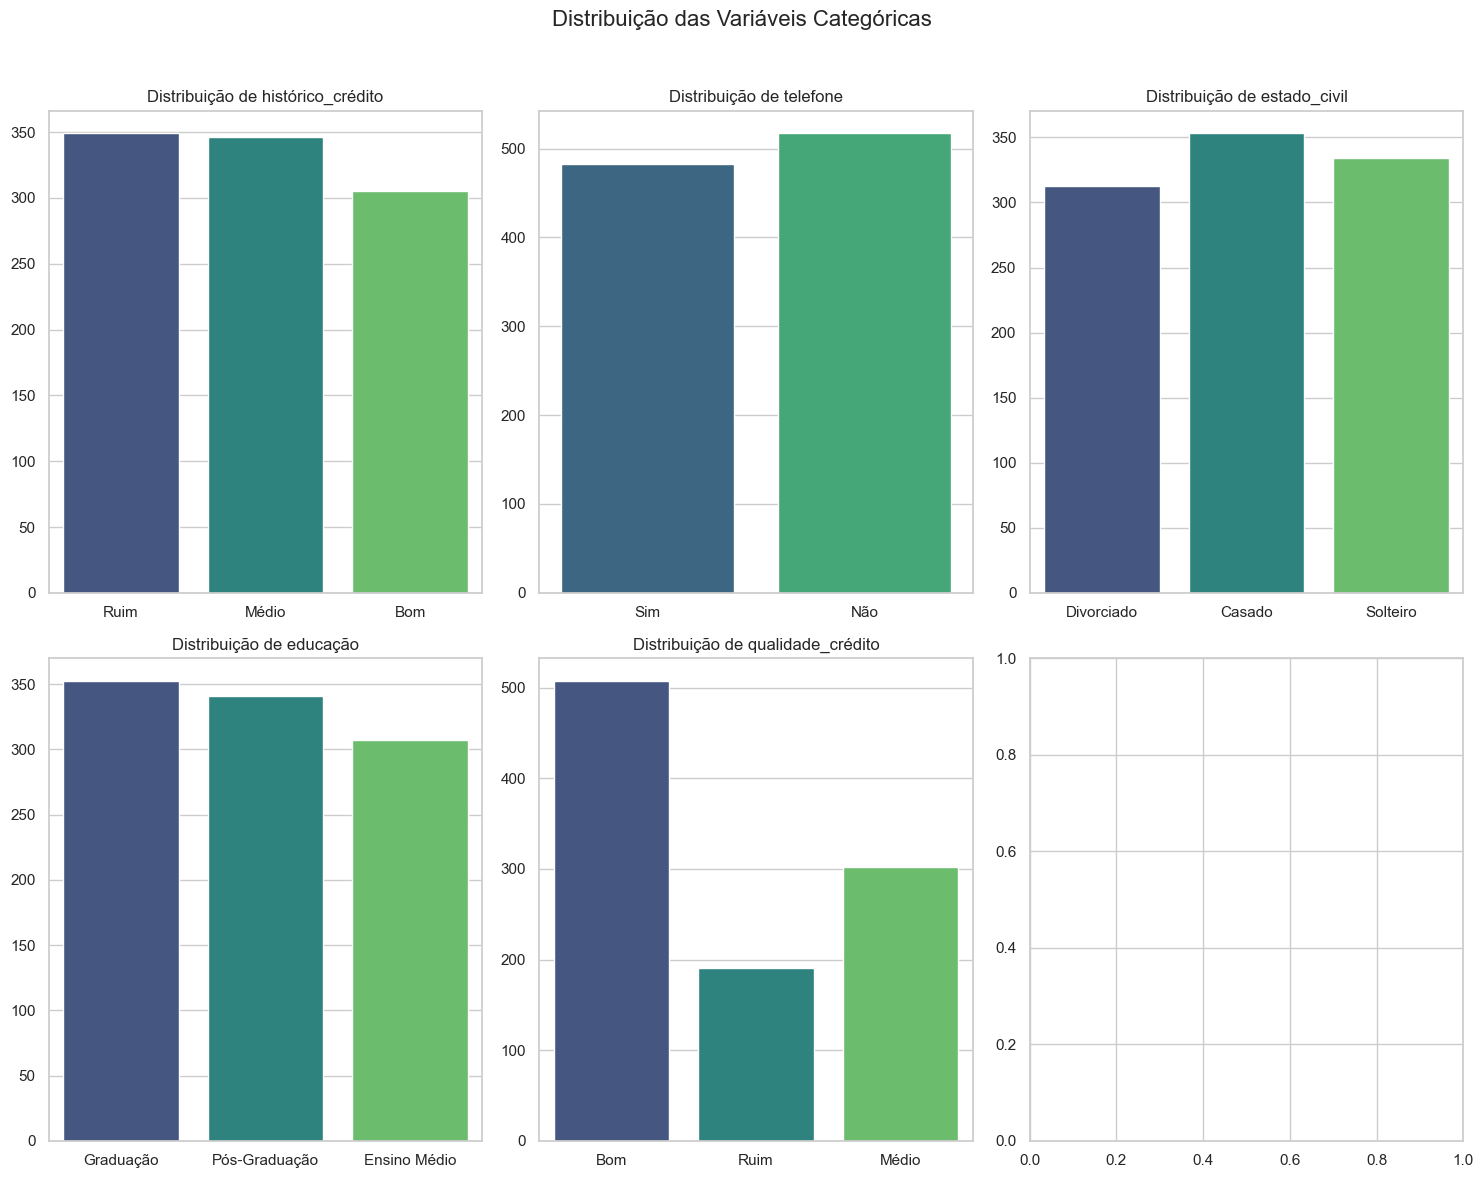

In [3]:
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 3, figsize=(15, 12))
fig.suptitle('Distribuição das Variáveis Categóricas', fontsize=16)

categorical_columns = df.select_dtypes(include=['object']).columns
for i, column in enumerate(categorical_columns):
    ax = axs[i // 3, i % 3]
    sns.countplot(x=df[column], ax=ax, hue=df[column], palette='viridis')
    ax.set_title(f'Distribuição de {column}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 3.2 Distribuição das Variáveis Numéricas

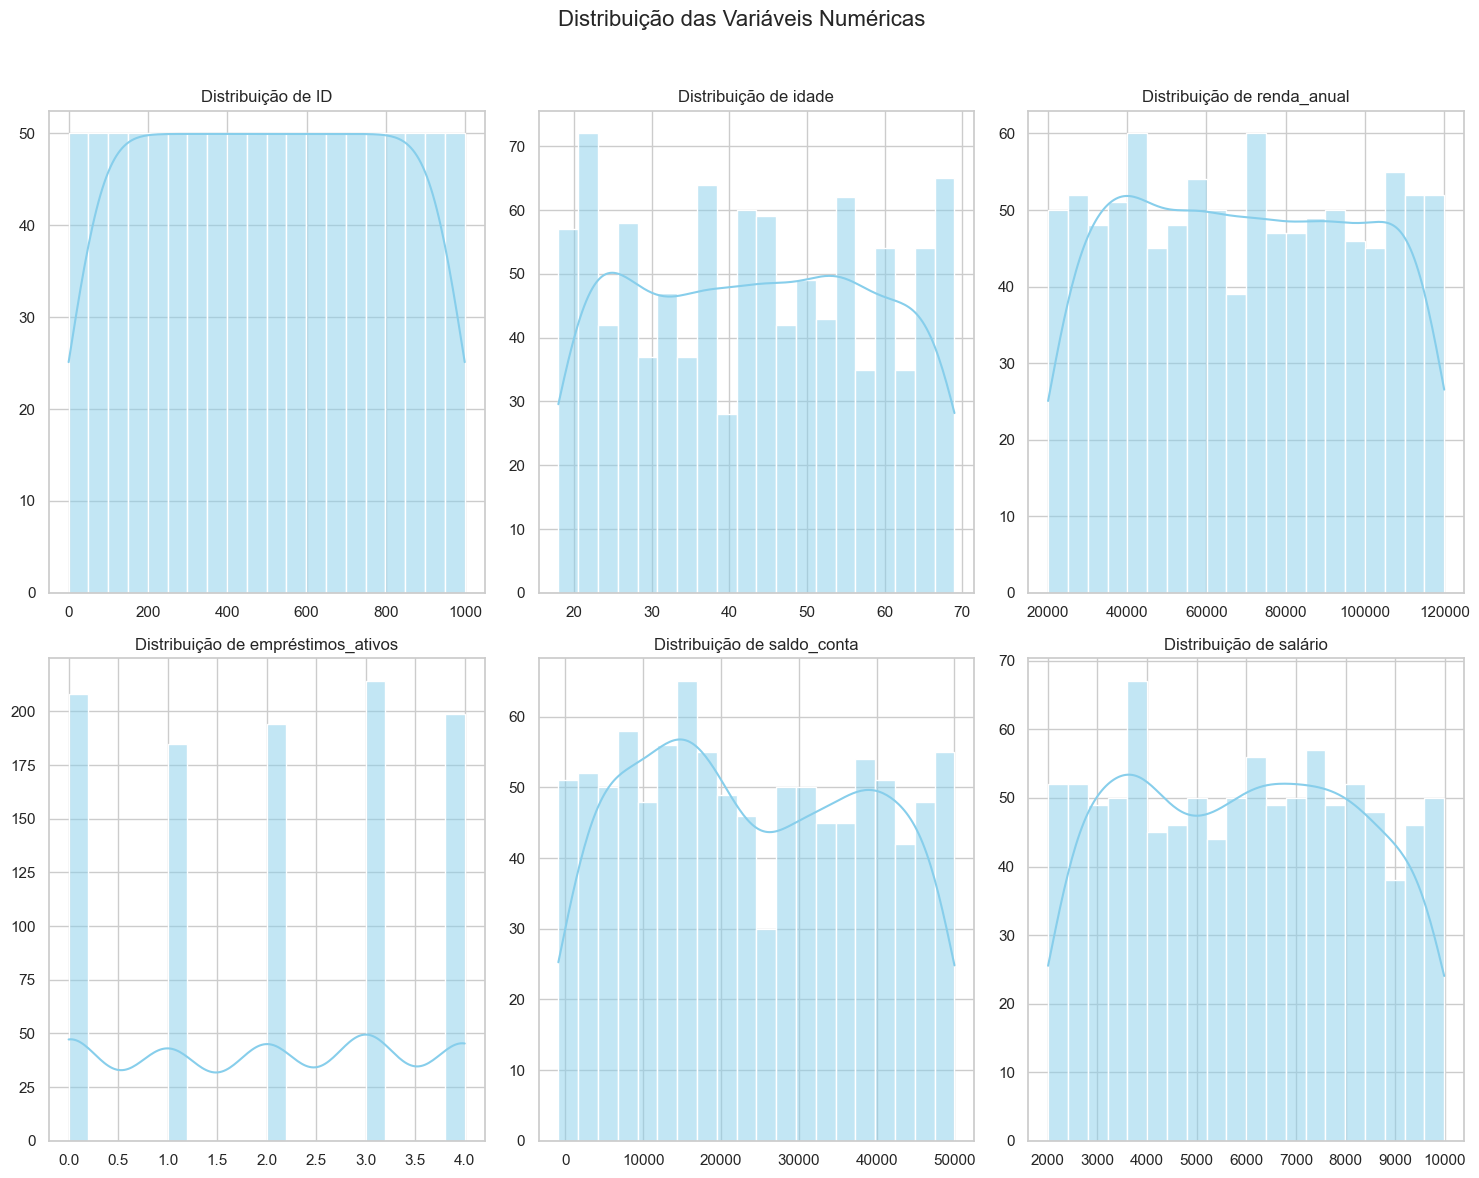

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(15, 12))
fig.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)

numerical_columns = df.select_dtypes(include=['number']).columns
for i, column in enumerate(numerical_columns):
    ax = axs[i // 3, i % 3]
    sns.histplot(df[column], bins=20, kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Distribuição de {column}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 3.3 Boxplots para variáveis numéricas

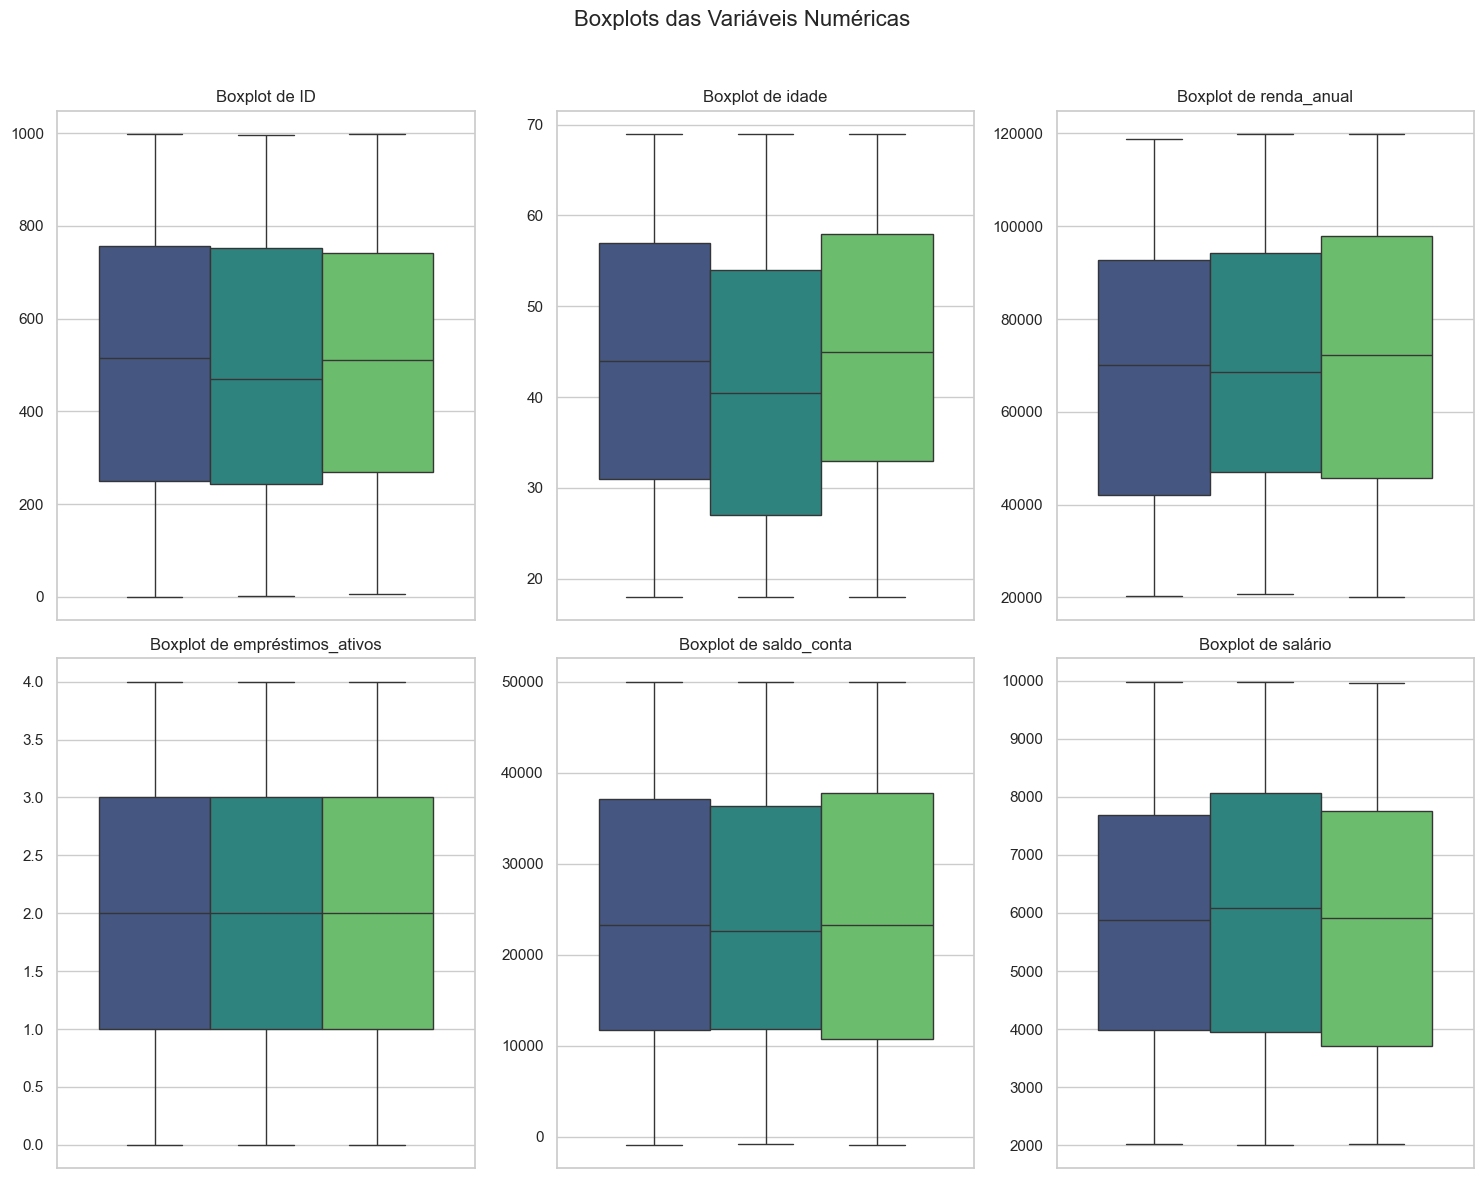

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(15, 12))
fig.suptitle('Boxplots das Variáveis Numéricas', fontsize=16)

for i, column in enumerate(numerical_columns):
    ax = axs[i // 3, i % 3]
    sns.boxplot(y=df[column], ax=ax, hue=df['histórico_crédito'], palette='viridis', legend=False)
    ax.set_title(f'Boxplot de {column}')
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 3.4 Matriz de Correlação

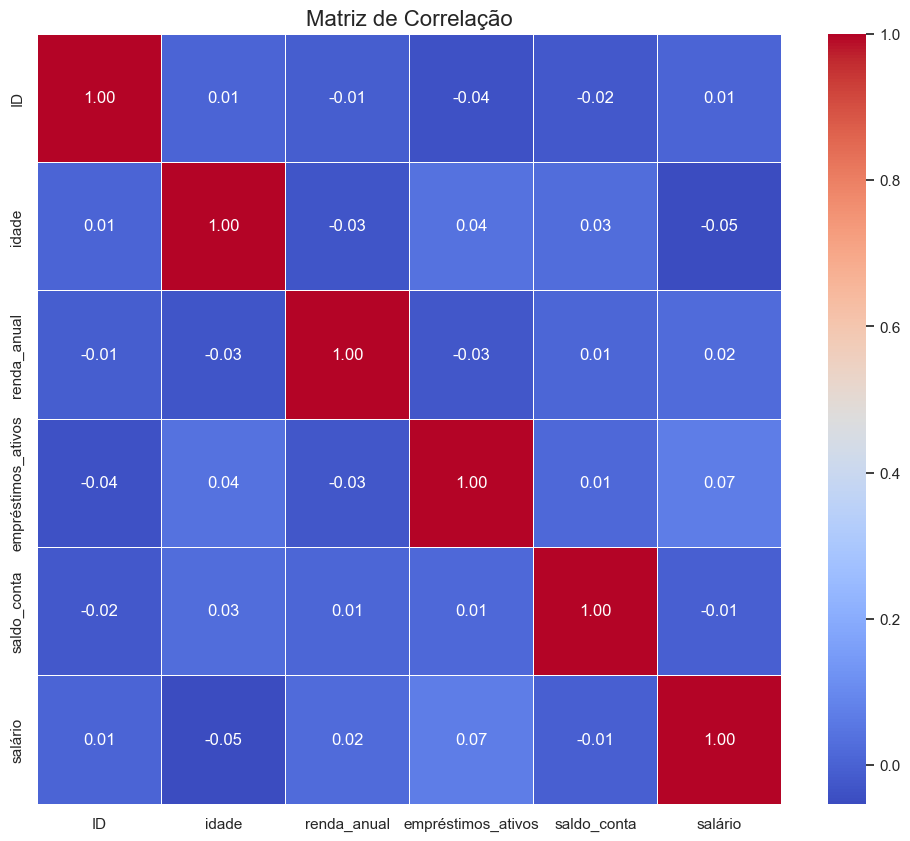

In [6]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

## 3.4 Análise da Variável de Destino

C:\Users\filip\AppData\Local\Temp\ipykernel_12824\429426850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='qualidade_crédito', data=df, palette='viridis')


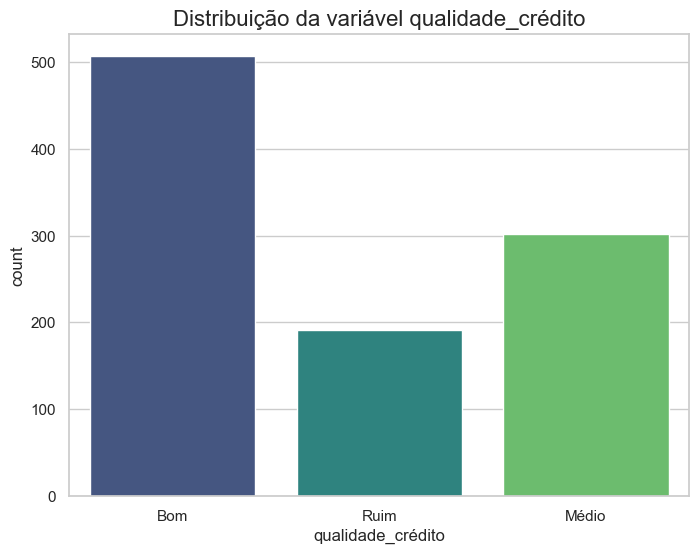

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='qualidade_crédito', data=df, palette='viridis')
plt.title('Distribuição da variável qualidade_crédito', fontsize=16)
plt.show()

# 4 Redução de Dimensionalidade

## 4.1 Enconding Categorical

In [8]:
# Pré-processamento
X = df.drop(['ID', 'qualidade_crédito'], axis=1)
y = df['qualidade_crédito']

# Identificando as variáveis categóricas
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
numerical_columns = X.select_dtypes(include=['number']).columns

# Aplicando o encoding apenas às variáveis categóricas
X_categorical_encoded = pd.get_dummies(X[categorical_columns], drop_first=True).astype(int)

# Mantendo as variáveis numéricas como estão
X_numerical = X[numerical_columns]

# Concatenando variáveis categóricas codificadas e variáveis numéricas
X_encoded = pd.concat([X_numerical, X_categorical_encoded], axis=1)

In [9]:
X_encoded.head()

,idade,renda_anual,empréstimos_ativos,saldo_conta,salário,histórico_crédito_Médio,histórico_crédito_Ruim,telefone_Sim,estado_civil_Divorciado,estado_civil_Solteiro,educação_Graduação,educação_Pós-Graduação
0,62,73478,0,4957.157365,6003.949487,0,1,1,1,0,1,0
1,65,65560,3,21062.428796,2468.656185,1,0,0,1,0,1,0
2,18,91592,3,32650.005499,8220.505555,1,0,1,0,0,1,0
3,21,88246,0,3818.851236,6309.666029,1,0,1,0,1,0,1
4,21,105022,2,14619.723854,5445.211618,1,0,1,0,1,1,0


## 4.2 Normalização

In [10]:
# Normalização
scaler = StandardScaler()
X_encoded_scaled = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns)

In [11]:
X_encoded_scaled.head()

,idade,renda_anual,empréstimos_ativos,saldo_conta,salário,histórico_crédito_Médio,histórico_crédito_Ruim,telefone_Sim,estado_civil_Divorciado,estado_civil_Solteiro,educação_Graduação,educação_Pós-Graduação
0,1.229628,0.121072,-1.412532,-1.288831,0.032092,-0.727360,1.365771,1.034598,1.481516,-0.708168,1.356801,-0.719340
1,1.426547,-0.151278,0.694676,-0.199906,-1.508398,1.374836,-0.732187,-0.966559,1.481516,-0.708168,1.356801,-0.719340
2,-1.658518,0.744125,0.694676,0.583565,0.997948,1.374836,-0.732187,1.034598,-0.674985,-0.708168,1.356801,-0.719340
3,-1.461599,0.629035,-1.412532,-1.365796,0.165307,1.374836,-0.732187,1.034598,-0.674985,1.412095,-0.737028,1.390162
4,-1.461599,1.206066,-0.007726,-0.635517,-0.211376,1.374836,-0.732187,1.034598,-0.674985,1.412095,1.356801,-0.719340


## 4.3 PCA

In [12]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded_scaled)

## 4.4 t-SNE

In [13]:
# t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_encoded_scaled)

c:\Users\filip\GitHub\FIAP-Feature-Engineering\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\filip\GitHub\FIAP-Feature-Engineering\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


## 4.5 LDA

In [14]:
# LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_encoded_scaled, y)

## 4.6 Visualização

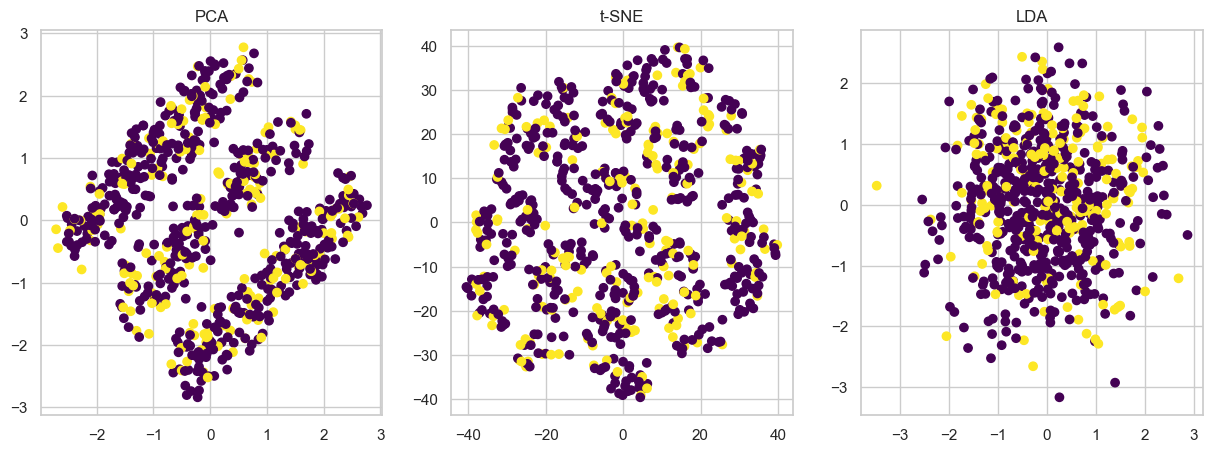

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.map({'Bom': 0, 'Ruim': 1}), cmap='viridis')
plt.title('PCA')

plt.subplot(1, 3, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.map({'Bom': 0, 'Ruim': 1}), cmap='viridis')
plt.title('t-SNE')

plt.subplot(1, 3, 3)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y.map({'Bom': 0, 'Ruim': 1}), cmap='viridis')
plt.title('LDA')

plt.show()

# 5 Lidando com Desbalanceamento de Classes

## 5.1 Balanceamento via SMOTE

In [16]:
# Balanceamento de classes
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X_encoded_scaled, y)

In [17]:
X_smote.head()

,idade,renda_anual,empréstimos_ativos,saldo_conta,salário,histórico_crédito_Médio,histórico_crédito_Ruim,telefone_Sim,estado_civil_Divorciado,estado_civil_Solteiro,educação_Graduação,educação_Pós-Graduação
0,1.229628,0.121072,-1.412532,-1.288831,0.032092,-0.727360,1.365771,1.034598,1.481516,-0.708168,1.356801,-0.719340
1,1.426547,-0.151278,0.694676,-0.199906,-1.508398,1.374836,-0.732187,-0.966559,1.481516,-0.708168,1.356801,-0.719340
2,-1.658518,0.744125,0.694676,0.583565,0.997948,1.374836,-0.732187,1.034598,-0.674985,-0.708168,1.356801,-0.719340
3,-1.461599,0.629035,-1.412532,-1.365796,0.165307,1.374836,-0.732187,1.034598,-0.674985,1.412095,-0.737028,1.390162
4,-1.461599,1.206066,-0.007726,-0.635517,-0.211376,1.374836,-0.732187,1.034598,-0.674985,1.412095,1.356801,-0.719340
